# Lending Club Case Study- Exploratory data Analysis #

***Assignment Brief :*** <br>
To develop a basic understnading of risk analytics and finance services.
<br><br>
***Businees Objective :*** <br>
To analyze the loan datset and discover the driving factors leading to loan default and asses the risk.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Allows us to see graphs in the notebook itself
%matplotlib inline

#For better readability
pd.options.display.float_format = '{:.2f}'.format

<font color=red>***Assumption: Data is assumed to be in the same folder where the jupyter notebook is present***</font>

# 1. Data Loading#

In [3]:
loan= pd.read_csv('loan.csv', encoding='ISO-8859-1', low_memory=False)

FileNotFoundError: [Errno 2] File b'loan.csv' does not exist: b'loan.csv'

In [4]:
loan.shape

(39717, 111)

In [ ]:
# number of missing values
loan.info()

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


# 2. Data Cleaning#

## 2.1 Handling missing Values ##

1. **Finding the missing value percentage(%) in each column**

In [6]:
missing_df = round(100*(loan.isnull().sum()/len(loan)), 2)

In [7]:
#Columns that has more than 50% missing values should be seggregated and removed from analysis
missing_df = missing_df.loc[missing_df >= 50.0]
print(missing_df.sort_values())
print(len(missing_df))

mths_since_last_delinq            64.66
mths_since_last_record            92.99
next_pymnt_d                      97.13
mo_sin_rcnt_tl                   100.00
mort_acc                         100.00
mths_since_recent_bc             100.00
mths_since_recent_bc_dlq         100.00
mths_since_recent_inq            100.00
mths_since_recent_revol_delinq   100.00
num_accts_ever_120_pd            100.00
num_actv_bc_tl                   100.00
num_actv_rev_tl                  100.00
num_bc_sats                      100.00
num_bc_tl                        100.00
num_il_tl                        100.00
num_op_rev_tl                    100.00
num_rev_accts                    100.00
num_rev_tl_bal_gt_0              100.00
num_sats                         100.00
num_tl_120dpd_2m                 100.00
num_tl_30dpd                     100.00
num_tl_90g_dpd_24m               100.00
num_tl_op_past_12m               100.00
pct_tl_nvr_dlq                   100.00
percent_bc_gt_75                 100.00


2. **Columns having more than 50% NA values can be removed as it cannot contribute significantly to the analysis**

In [8]:
loan.drop(list(missing_df.index), axis=1, inplace=True)

In [9]:
loan.shape

(39717, 54)

3. **Columns having the value as only 0 or NaN can be removed.**

In [10]:
for column in loan:
    num_unique = loan[column].nunique()
    
    if(num_unique <= 5):
        print(column)
        print(loan[column].unique())
        print("\n")

term
[' 36 months' ' 60 months']


home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


verification_status
['Verified' 'Source Verified' 'Not Verified']


loan_status
['Fully Paid' 'Charged Off' 'Current']


pymnt_plan
['n']


pub_rec
[0 1 2 3 4]


initial_list_status
['f']


collections_12_mths_ex_med
[ 0. nan]


policy_code
[1]


application_type
['INDIVIDUAL']


acc_now_delinq
[0]


chargeoff_within_12_mths
[ 0. nan]


delinq_amnt
[0]


pub_rec_bankruptcies
[ 0.  1.  2. nan]


tax_liens
[ 0. nan]




In [11]:
loan.groupby('pub_rec_bankruptcies')['id'].nunique()

pub_rec_bankruptcies
0.00    37339
1.00     1674
2.00        7
Name: id, dtype: int64

From the above, it can be deduced that the following columns can be removed as it has only 0 and Nan values
1. collections_12_mths_ex_med
2. acc_now_delinq
3. chargeoff_within_12_mths
4. delinq_amnt
5. tax_liens

The above columns cannot contribute significantly to the analysis.

In [12]:
#Deleting columns collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
loan.drop(['collections_12_mths_ex_med', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1, inplace=True)

In [13]:
loan.shape

(39717, 49)

In [14]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0.00


## 2.2 Removing irrelevant data w.r.t analysis ##

1. **Removing column application_type**

In [15]:
loan.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

In [16]:
loan.application_type.nunique()

1

From the above outputs, it is clear that it has only 1 value for each of the row. Hence, this column cannot contribute much to the analyis and can be removed

In [17]:
loan.drop('application_type', axis=1, inplace=True)

2. **Removing column pymnt_plan**

In [18]:
loan.pymnt_plan.unique()

array(['n'], dtype=object)

In [19]:
loan.pymnt_plan.nunique()

1

From the above outputs, it is clear that it has only 1 value for each of the row. Hence, this column cannot contribute much to the analyis and can be removed

In [20]:
loan.drop('pymnt_plan', axis=1, inplace=True)

3. **Removing column initial_list_status**

In [21]:
loan.initial_list_status.unique()

array(['f'], dtype=object)

In [22]:
loan.initial_list_status.nunique()

1

From the above outputs, it is clear that it has only 1 value for each of the row. Hence, this column cannot contribute much to the analyis and can be removed

In [23]:
loan.drop('initial_list_status', axis=1, inplace=True)

4. **Id, member id and url cannot be used for analysis which can provide some meaningful insight. Hence, it can be removed**

In [24]:
loan.drop(['id','member_id','url'],axis=1,inplace=True)

5. **desc clumn has raw text which cannot contribute directly to inferential statistics. Hence, it can be removed**

In [25]:
loan.drop('desc', axis=1, inplace=True)

6. **Removing column policy_code**

In [26]:
loan.policy_code.unique()

array([1], dtype=int64)

In [27]:
loan.policy_code.nunique()

1

From the above outputs, it is clear that it has only 1 value for each of the row. Hence, this column cannot contribute much to the analyis and can be removed

In [28]:
loan.drop('policy_code', axis=1, inplace=True)

7. **Deleting columns with less than 6% values having zero as one of the values**

In [29]:
column_less_than_6 = []
for column in loan.columns:
    if loan[column].dtype == 'int64' or loan[column].dtype == 'float64':
        if 0 in loan[column].unique():
            non_zero_percent = round(((loan[column].astype(bool).sum(axis=0))/(loan[column].count()) * 100),2)
            if non_zero_percent < 6:
                print(f'{column:20} : {str(non_zero_percent):5}')
                column_less_than_6.append(column)

pub_rec              : 5.33 
out_prncp            : 2.87 
out_prncp_inv        : 2.87 
total_rec_late_fee   : 5.15 


In [30]:
loan.drop(column_less_than_6, axis=1,inplace=True)

8. **Removing outlier from annual_inc column**

In [31]:
loan['annual_inc'].describe()

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

1. The maximum value is almost 100 times more than the mean value. It means there are outliers present in the column.
1. Outliers needs to be found and removed
1. A box plot can help us in detecting the outliers.

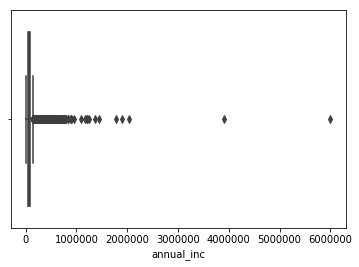

In [32]:
sns.boxplot(data=loan,x='annual_inc')

1. From the above it is clear that the outliers are present in the column value
2. Outliers can be removed by using 95 percentile values

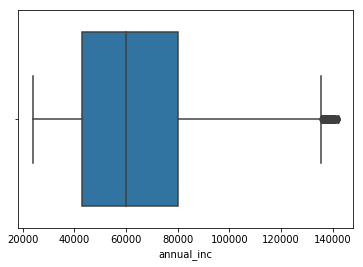

In [33]:
income_series = np.percentile(loan['annual_inc'], [5,95])
loan = loan[(loan.annual_inc > income_series[0]) & (loan.annual_inc < income_series[1])]

sns.boxplot(data=loan,x='annual_inc')

9. **Replacing NaN values in emp_length column with zero values**

In [36]:
loan.fillna({'emp_length':0}, inplace=True)

In [37]:
loan.shape

(35523, 37)

# 3. Data Modification #

1. **Removing % symbol from int rate column**

In [38]:
loan['int_rate'] = loan['int_rate'].str.replace('%', '')
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1008.71,1008.71,456.46,435.17,117.08,1.11,Apr-13,119.66,Sep-13,0.00
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,12231.89,10000.00,2214.92,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,3000,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,3513.33,3513.33,2475.94,1037.39,0.00,0.00,May-16,67.79,May-16,0.00
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0.00
6,7000,7000,7000.00,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,10110.84,6985.61,3125.23,0.00,0.00,May-16,1313.76,May-16,0.00


In [39]:
loan['int_rate'] = pd.to_numeric(loan['int_rate'])

2. **Removing "months" from term column values**

In [40]:
loan['term'] = loan['term'].str.replace('months', '')
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,2500,2500.00,60,15.27,59.83,C,C4,Ryder,< 1 year,...,1008.71,1008.71,456.46,435.17,117.08,1.11,Apr-13,119.66,Sep-13,0.00
3,10000,10000,10000.00,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,12231.89,10000.00,2214.92,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,3000,3000,3000.00,60,12.69,67.79,B,B5,University Medical Group,1 year,...,3513.33,3513.33,2475.94,1037.39,0.00,0.00,May-16,67.79,May-16,0.00
5,5000,5000,5000.00,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,5632.21,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0.00
6,7000,7000,7000.00,60,15.96,170.08,C,C5,Southern Star Photography,8 years,...,10110.84,10110.84,6985.61,3125.23,0.00,0.00,May-16,1313.76,May-16,0.00


In [ ]:
#Converting string value of the term column to an int value
loan['term'] = pd.to_numeric(loan['term'])
loan.term.head()

3. **Removing %sign from revol_util column**

In [41]:
loan['revol_util'] = loan['revol_util'].str.replace('%', '')
loan['revol_util'] = pd.to_numeric(loan['revol_util'])

4. **Converting the dtype for the date columns(string values) into python date time format**

In [42]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

5. **Creating an issue_year column by extracting year from issue_d column**

In [43]:
loan['issue_year'] = pd.to_datetime(loan['issue_d']).dt.year

6. **Quantifying the tenure of employment length**

In [44]:
loan['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan['emp_length'] = pd.to_numeric(loan['emp_length'])

7. **Removing entries for which the loan status is current**

In [45]:
loan = loan[loan['loan_status'].isin(['Fully Paid','Charged Off'])]
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year
1,2500,2500,2500.00,60,15.27,59.83,C,C4,Ryder,1,...,1008.71,456.46,435.17,117.08,1.11,2013-04-01,119.66,2013-09-01,0.00,2011
3,10000,10000,10000.00,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,12231.89,10000.00,2214.92,0.00,0.00,2015-01-01,357.48,2016-04-01,0.00,2011
5,5000,5000,5000.00,36,7.90,156.46,A,A4,Veolia Transportaton,3,...,5632.21,5000.00,632.21,0.00,0.00,2015-01-01,161.03,2016-01-01,0.00,2011
6,7000,7000,7000.00,60,15.96,170.08,C,C5,Southern Star Photography,8,...,10110.84,6985.61,3125.23,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.00,2011
7,3000,3000,3000.00,36,18.64,109.43,E,E1,MKC Accounting,9,...,3939.14,3000.00,939.14,0.00,0.00,2015-01-01,111.34,2014-12-01,0.00,2011


8. **Removing entires for which home ownership is other or none**

In [46]:
loan.drop(loan[loan['home_ownership'].isin(['OTHER', 'NONE', 'ANY'])].index,inplace=True)
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

9. **Creating a derieved metric: Loan to Income Ratio**

In [47]:
loan['loan_income_ratio']= loan['loan_amnt']/loan['annual_inc']

# 4. Data Analysis #

1. **Checking the data types of the columns**

In [48]:
loan.dtypes

loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                          int64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                          

In [49]:
loan.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O'), dtype('<M8[ns]')],
      dtype=object)

2. ***Summary Matrix for Non Categorical Column*** : Finding columns which are either integer or float type and describing it. This help us in finding other related statistical information which will furhter aid in analysis

In [50]:
numeric_col = []
for column in loan.columns:
    if(loan[column].dtype == 'int64' or loan[column].dtype == 'float64'): #Only numeric data types can be statistically analyzed
        numeric_col.append(column)
        
loan[numeric_col].describe(percentiles=[.1, .25, .5, .75, .9]).transpose()

,count,mean,std,min,10%,25%,50%,75%,90%,max
loan_amnt,34400.00,11068.73,7068.25,500.00,3500.00,5800.00,10000.00,15000.00,20675.00,35000.00
funded_amnt,34400.00,10809.26,6818.27,500.00,3500.00,5600.00,9800.00,15000.00,20000.00,35000.00
funded_amnt_inv,34400.00,10253.96,6760.96,0.00,3000.00,5000.00,9000.00,14000.00,19925.00,35000.00
int_rate,34400.00,11.90,3.69,5.42,6.99,8.94,11.71,14.35,16.77,24.40
installment,34400.00,322.55,199.73,16.08,104.46,171.43,283.20,423.11,603.14,1305.19
emp_length,34400.00,5.02,3.44,0.00,1.00,2.00,4.00,9.00,10.00,10.00
annual_inc,34400.00,63561.94,26508.72,24044.00,33600.00,42500.00,59278.00,80000.00,102000.00,141996.00
dti,34400.00,13.52,6.63,0.00,4.28,8.47,13.68,18.75,22.40,29.99
delinq_2yrs,34400.00,0.15,0.49,0.00,0.00,0.00,0.00,0.00,1.00,11.00
inq_last_6mths,34400.00,0.87,1.07,0.00,0.00,0.00,1.00,1.00,2.00,8.00


3. **Finding columns which can be used for categorical analysis. There may be still other columns which falls into categorical analysis. But this will highlight most of the categorical columns**

In [51]:
for column in loan.columns:
    if(loan[column].dtype == 'object'): 
        print('Column Name : ' + column)
        print(loan[column].unique())
        print() #For creating a space between details of two columns

Column Name : term
[' 60 ' ' 36 ']

Column Name : grade
['C' 'A' 'E' 'F' 'B' 'D' 'G']

Column Name : sub_grade
['C4' 'C1' 'A4' 'C5' 'E1' 'F2' 'C3' 'B5' 'B2' 'D1' 'A1' 'B3' 'B4' 'B1'
 'C2' 'D2' 'A5' 'A3' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F1' 'E5' 'G4'
 'E2' 'G2' 'G1' 'F5' 'F4' 'G5' 'G3']

Column Name : emp_title
['Ryder' 'AIR RESOURCES BOARD' 'Veolia Transportaton' ...
 'Rush Univ Med Grp' 'A. F. Wolfers, Inc.' 'FiSite Research']

Column Name : home_ownership
['RENT' 'OWN' 'MORTGAGE']

Column Name : verification_status
['Source Verified' 'Not Verified' 'Verified']

Column Name : loan_status
['Charged Off' 'Fully Paid']

Column Name : purpose
['car' 'other' 'wedding' 'debt_consolidation' 'small_business'
 'home_improvement' 'major_purchase' 'medical' 'credit_card' 'moving'
 'vacation' 'house' 'renewable_energy' 'educational']

Column Name : title
['bike' 'personel' 'My wedding loan I promise to pay back' ...
 "P's Family Credit Loan" 'My Credit Card Loan' 'MBA Loan Consolidation']

Col

From the above it is clear that the following columns could be definitely used for categorical analysis
* grade
* sub_grade
* home_ownership
* verification_status
* loan_status
* purpose

Also, the following two columns could be utilized for demographic analysis
* addr_state
* zip_code

For the categorical columns identified above, checking whether we don't have huge number of missing values

***Summary Matrix for Categorical Column***

In [52]:
categorical_col = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose']
loan[categorical_col].describe(include='all').transpose()

,count,unique,top,freq
grade,34400,7,B,10385
sub_grade,34400,35,A4,2582
home_ownership,34400,3,RENT,16441
verification_status,34400,3,Not Verified,15100
loan_status,34400,2,Fully Paid,29426
purpose,34400,14,debt_consolidation,16446


From the above table it is proved that there are no missing values for categorical variables

## 4.1 Univariate Analysis ##

***Continuous Variables*** <br>
Continuous variables are infinite in nature and spread over a wide range. Central tendency and spread of the variable needs to be understood for these variables. These are visualized using various statistical graphs like Box Plot, Histogram, Violin Plot etc.

***Categorical Variables*** <br>
Categorical variables assume certain values. These are best described using frequency table which can be used to understand the distribution in each individual category. Basically, it can be measured using two metrics, the total count for each category and the percentage of values occupied by each category.


**Function for creating plots related with univariate analysis**

In [53]:
def plot_col(data_frame,column,var_type,hue=None):
    
    '''
    plot_col is a common fuction which will be used to plot for all sorts categorical/continuous variables 
    encountered while doing univariate analysis
    
    data_frame : dataframe name
    column     : Column name
    var_type   : variable type : continuos or categorical
                     Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                     Categorical(1) : Countplot will be plotted.
    hue        : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if var_type == 0:                
        print(column + " Statistics : ")
        print(loan[column].describe())
        
        #Configuring matplotlib for displaying 3 plots in 1 row.
        figure, axis=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        
        #Setting distribution plot for first column
        axis[0].set_title('Distribution Plot')
        sns.distplot(data_frame[column],ax=axis[0])
        
        #Setting violin plot for second column
        axis[1].set_title("Violin Plot")
        sns.violinplot(data=data_frame, x=column,ax=axis[1], inner="quartile")
        
        #Setting violin plot for third column
        axis[2].set_title("Box Plot")
        sns.boxplot(data=data_frame, x=column,ax=axis[2],orient='v')
   

    
    if var_type == 1:
        print(column + " Statistics : ")
        print(loan[column].value_counts())
        
        temp = pd.Series(data = hue)
        
        figure, axis = plt.subplots()
        width = len(data_frame[column].unique()) + 6 + 4*len(temp.unique())
        figure.set_size_inches(width , 7)
        
        axis = sns.countplot(data = data_frame, x=column, order=data_frame[column].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in axis.patches:
                axis.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in axis.patches:
                axis.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        
        
    else:
        exit
        
    plt.show()

### 4.1.1 Continuous variables ###

### <font color=green>Column : loan_amnt</font>###

Text(0.5, 1.0, 'Total committed by Investors')

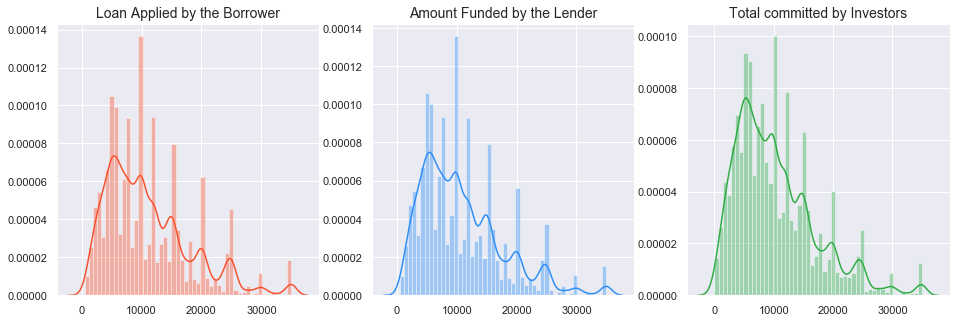

In [57]:
figure, axis = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(loan["loan_amnt"].values, ax=axis[0], color="#F7522F")
axis[0].set_title("Loan Applied by the Borrower", fontsize=14)

sns.distplot(loan["funded_amnt"].values, ax=axis[1], color="#2F8FF7")
axis[1].set_title("Amount Funded by the Lender", fontsize=14)

sns.distplot(loan["funded_amnt_inv"].values, ax=axis[2], color="#2EAD46")
axis[2].set_title("Total committed by Investors", fontsize=14)

<font color=blue>***Observation : loan amount and funded amoount are same. In this case, funded amount can be removed from the data set***</font>

In [58]:
loan.drop(['funded_amnt'], axis=1, inplace=True)

### <font color=green>Column : int_rate</font>###

int_rate Statistics : 
count   34400.00
mean       11.90
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.35
max        24.40
Name: int_rate, dtype: float64


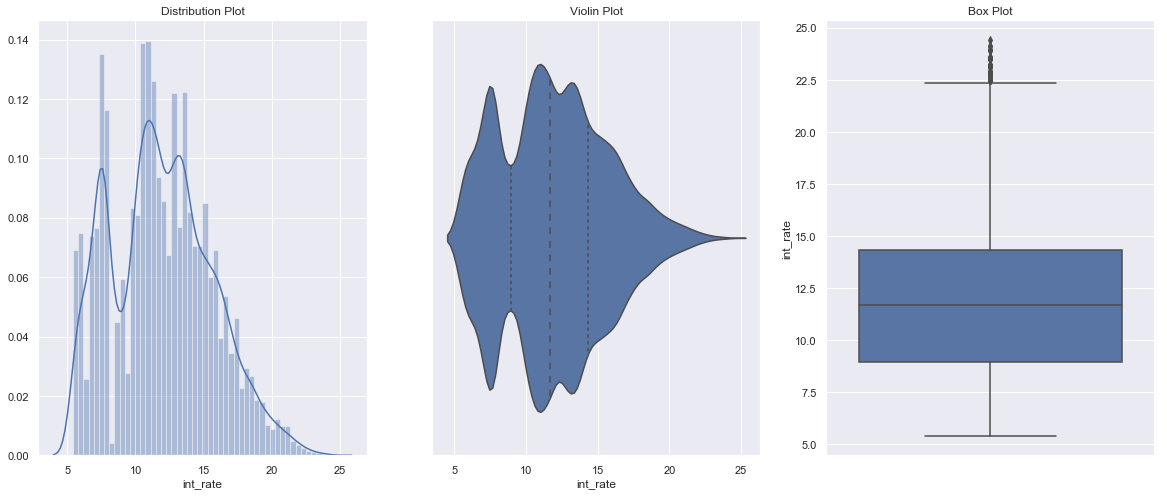

In [54]:
plot_col(loan, column='int_rate', var_type=0)

<font color=blue>***Observation : Most of the interest rates are between 5 and 10% with a maximum interest rate of 24% approx.***</font>

### <font color=green>Column : annual_inc</font>###

annual_inc Statistics : 
count    34400.00
mean     63561.94
std      26508.72
min      24044.00
25%      42500.00
50%      59278.00
75%      80000.00
max     141996.00
Name: annual_inc, dtype: float64


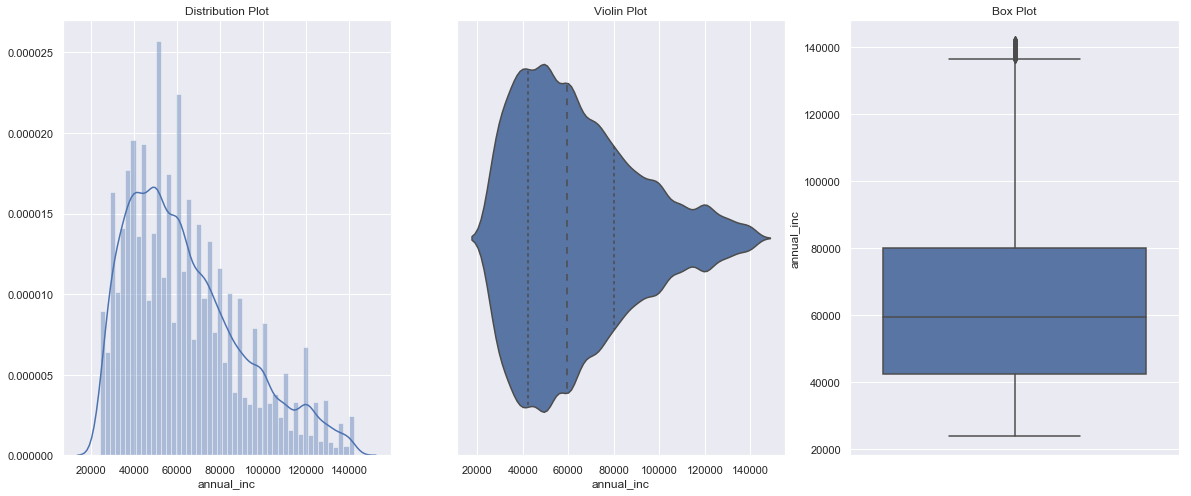

In [59]:
plot_col(loan, column='annual_inc', var_type=0)

<font color=blue>***Observation : In 75% cases, the annual income of the client is less than 80000. There were extremely large annual income in the dataset which were more than 150 times than the mean annual income. These has been removed from the dataset***</font>

### <font color=green>Column : dti</font>###

dti Statistics : 
count   34400.00
mean       13.52
std         6.63
min         0.00
25%         8.47
50%        13.68
75%        18.75
max        29.99
Name: dti, dtype: float64


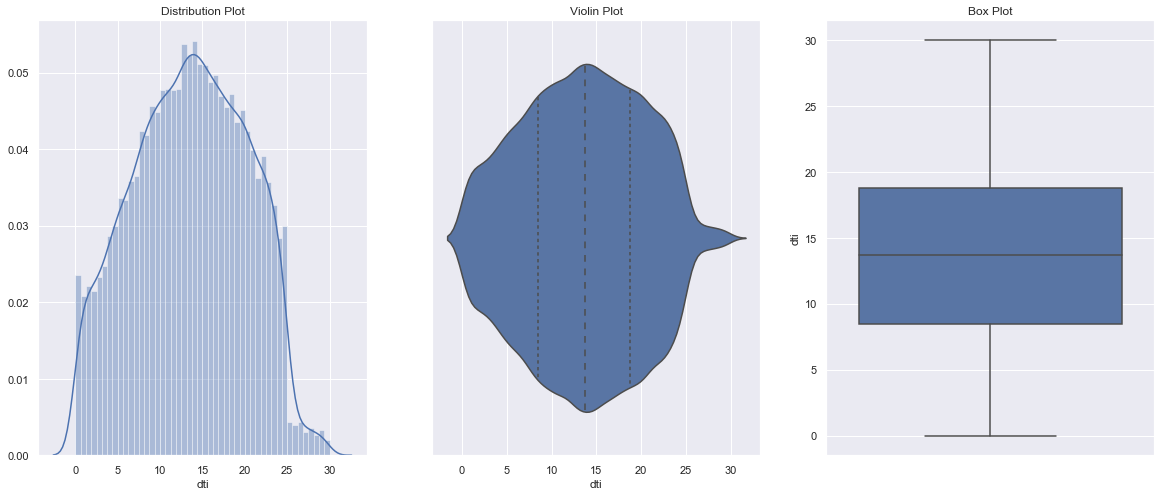

In [60]:
plot_col(data_frame=loan, column='dti', var_type=0)

<font color=blue>***Observation : dti is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income***</font>

### 4.1.2 Categorical variables ###

### <font color=green>Column : loan_status</font>###

loan_status Statistics : 
Fully Paid     29426
Charged Off     4974
Name: loan_status, dtype: int64


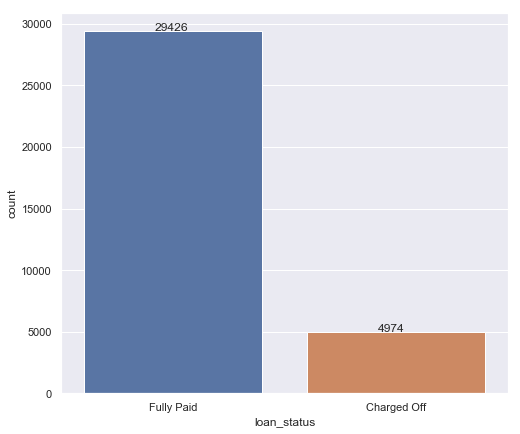

In [61]:
plot_col(loan, column='loan_status', var_type=1)

<font color=blue>***Observation : Around 14% of the loans have the status as charged off. This means that these loans have defaulted.***</font>

### <font color=green>Column : purpose</font>###

purpose Statistics : 
debt_consolidation    16446
credit_card            4576
other                  3289
home_improvement       2470
major_purchase         1860
small_business         1529
car                    1330
wedding                 862
medical                 596
moving                  473
vacation                330
house                   322
educational             236
renewable_energy         81
Name: purpose, dtype: int64


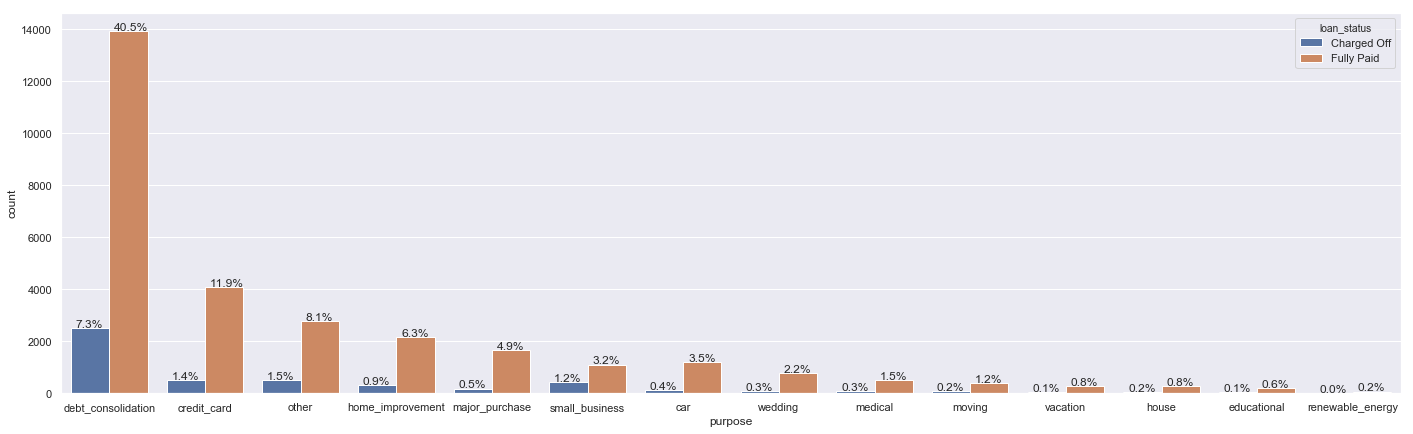

In [62]:
plot_col(data_frame=loan, column='purpose', var_type=1, hue='loan_status')

<font color=blue>***Observation : Approximately 40% of people took loan to settle thier other loans. And out of these people 7.3% defaulted their loan which is the highest among all other people who took for another reason. This means that there is a more tendency that around 7% people can default their loan if they have taken for repaying other loans***</font>

### <font color=green>Column : home_ownership</font>###

home_ownership Statistics : 
RENT        16441
MORTGAGE    15472
OWN          2487
Name: home_ownership, dtype: int64


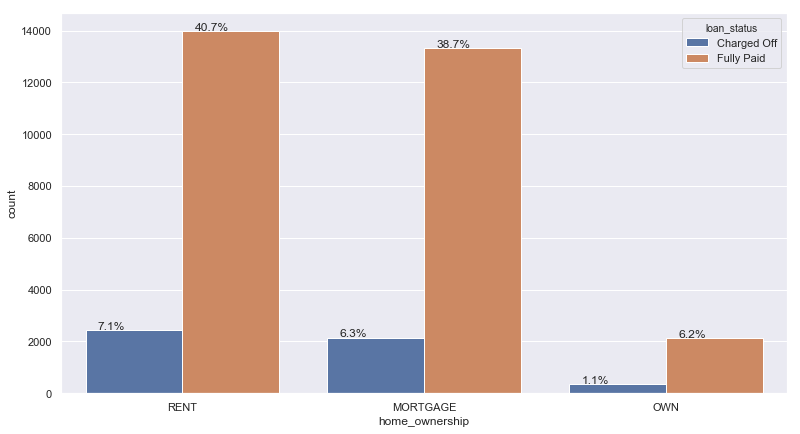

In [63]:
plot_col(loan, column='home_ownership', var_type=1, hue='loan_status')

<font color=blue>***Observation : From the above chart it is clear that people with their own homes have defaulted significantly less as compared to people living on rent and morgage.***</font>

### <font color=green>Column : issue_year</font>###

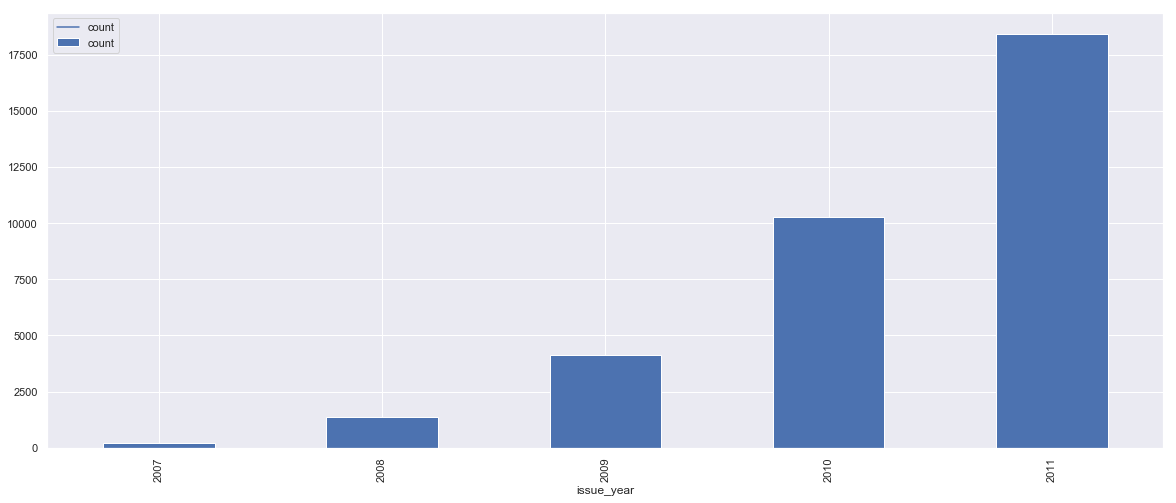

In [64]:
year_wise =loan.groupby(by= [loan.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
axis =year_wise.plot(figsize=(20,8))
year_wise.plot(kind='bar',figsize=(20,8),ax = axis)
plt.show()

<font color=blue>***Observation : There is a gradual increase in the number of people taking loans from 2007 to 20011 with maximum number of people taking loans in the year 2011 for the duration of 2007-2011***</font>

### <font color=green>Column : term</font>###

term Statistics : 
 36     25768
 60      8632
Name: term, dtype: int64


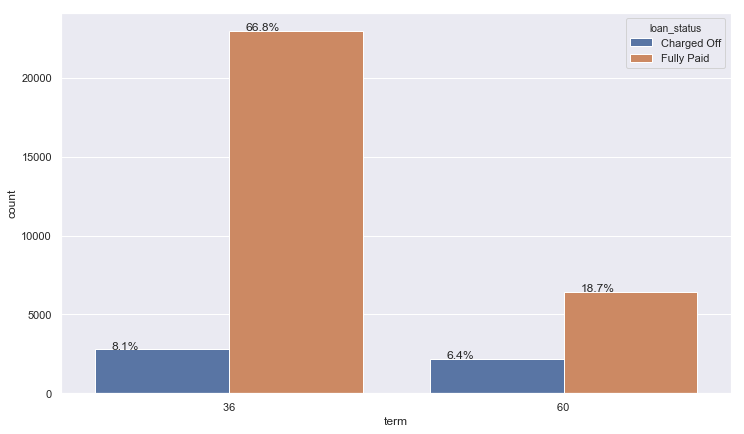

In [65]:
plot_col(loan, column='term', var_type=1, hue='loan_status')

<font color=blue>***Observation : More people are inclined to take loans of shorter duration as compared to longer duration of 60 months. But there is not a significant difference in the number of people defaulting loan based on the tenure of the loans***</font>

### <font color=green>Column : grade</font>###

grade Statistics : 
B    10385
A     9056
C     6993
D     4514
E     2348
F      850
G      254
Name: grade, dtype: int64


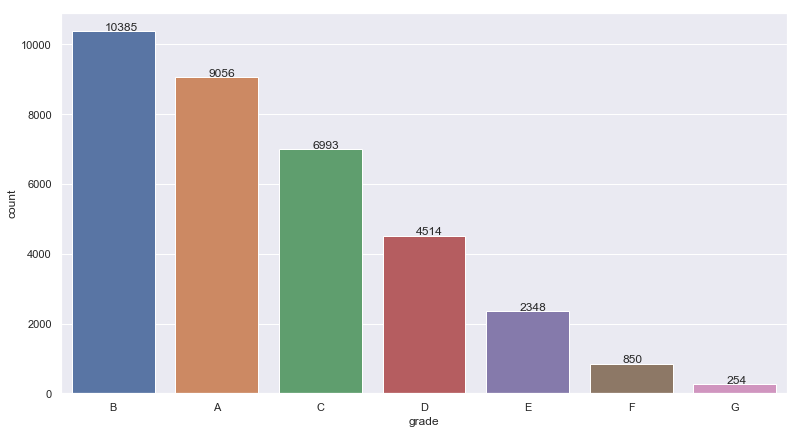

In [66]:
plot_col(loan, column='grade', var_type=1)

<font color=blue>***Observation : As compared to the people which are rated higher (A Grade), people with low rating (B Grade) tend to take more loans***</font>

### <font color=green>Column : sub_grade</font>###

sub_grade Statistics : 
A4    2582
B3    2496
A5    2430
B5    2346
B4    2189
C1    1851
B2    1768
C2    1727
A3    1634
B1    1586
A2    1364
C3    1333
D2    1156
C4    1071
A1    1046
C5    1011
D3     993
D1     814
D4     813
D5     738
E1     649
E2     532
E3     450
E4     384
E5     333
F1     265
F2     210
F3     146
F4     135
F5      94
G1      82
G2      65
G4      44
G3      41
G5      22
Name: sub_grade, dtype: int64


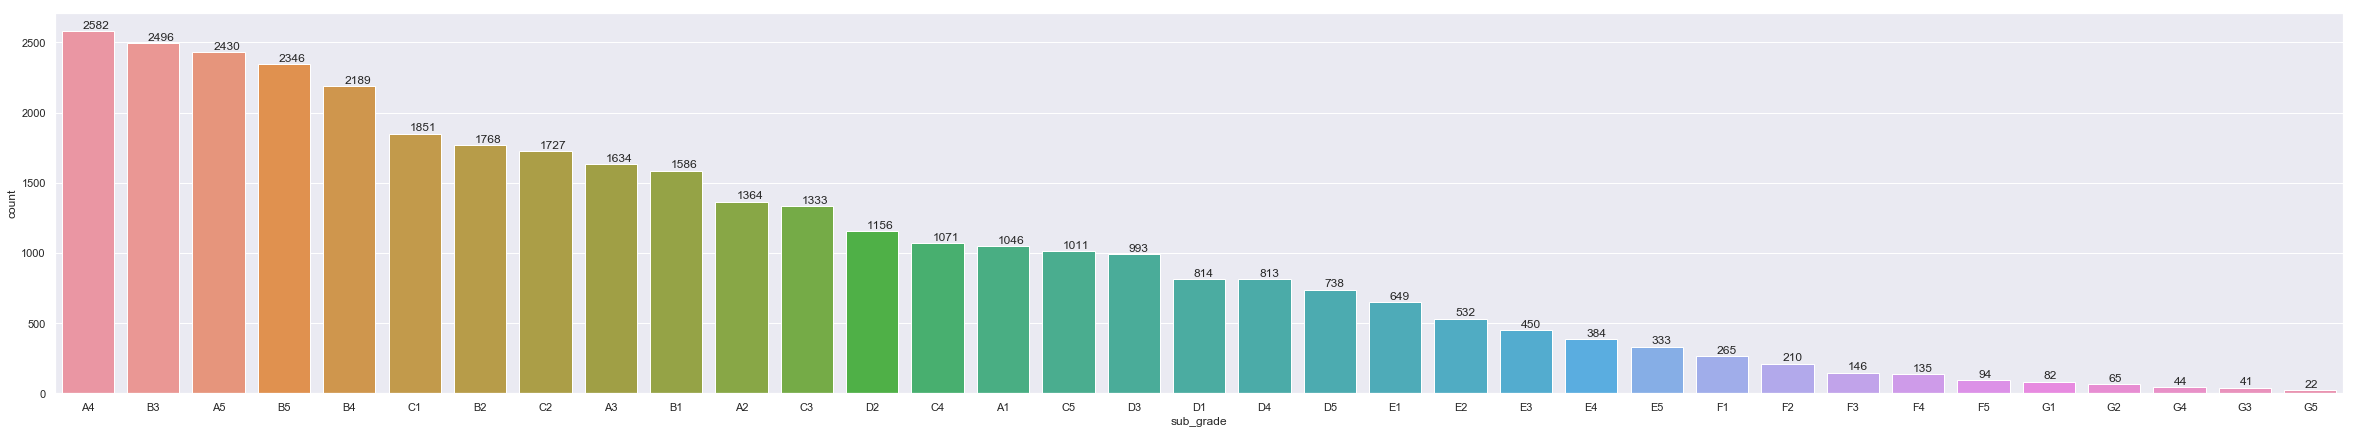

In [67]:
plot_col(loan, column='sub_grade', var_type=1)

<font color=blue>***Observation : But on a deeper lookout, people with grade A4 tends to take more loans***</font>

### <font color=green>Column : emp_length</font>###

emp_length Statistics : 
count   34400.00
mean        5.02
std         3.44
min         0.00
25%         2.00
50%         4.00
75%         9.00
max        10.00
Name: emp_length, dtype: float64


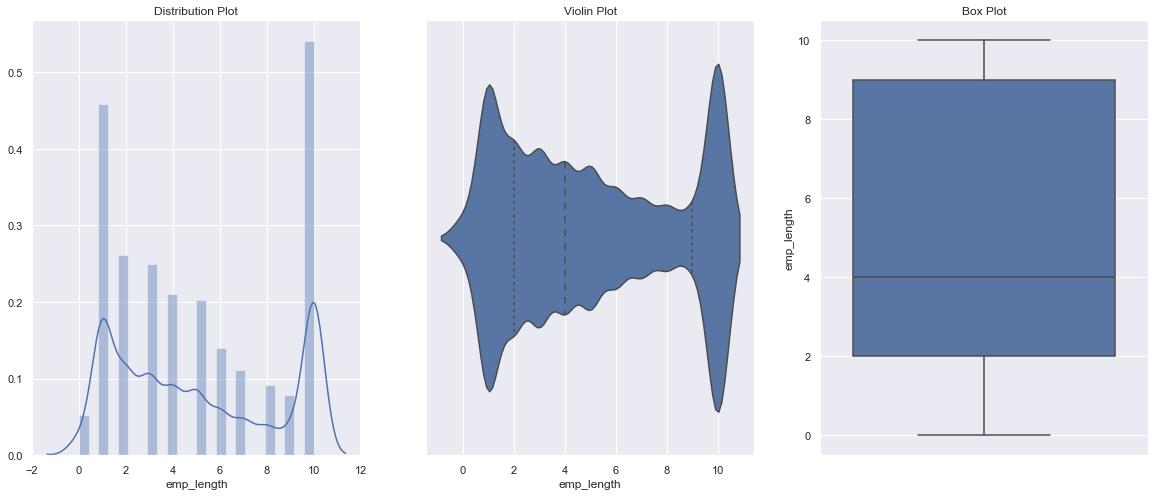

In [68]:
plot_col(loan, column='emp_length', var_type=0)

<font color=blue>***Observation : People tend to take more loans in their 4th year of employment whereas after a long employment tenure (10 years), the number of loans taken by them reduces***</font>

### <font color=green>Column : loan_income_ratio</font>###

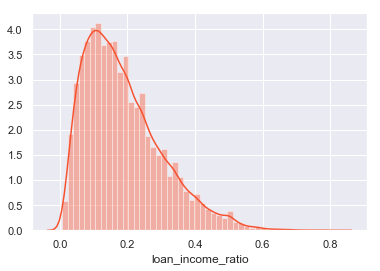

In [69]:
sns.distplot(loan['loan_income_ratio'],color="#F7522F")
sns.label = "Loan icome ratio"

<font color=blue>***Observation : On analyzing the loans, it seems that people tends to take around 1\5th of their annual income as loan. There can be a correlation between the loan income ratio and the loan status.***</font>

### <font color=green>Column : issue_d</font>###

Text(0.5, 0, 'loan of the month')

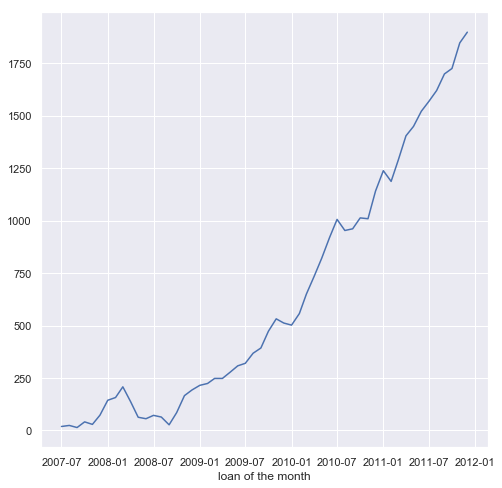

In [71]:
plt.figure(figsize=(8,8))
sns.lineplot(x=loan['issue_d'].value_counts().index,
              y=loan['issue_d'].value_counts().values)
plt.xlabel('loan of the month')

<font color=blue>***Observation : The highest number of loans has been taken in the month of January,2012. It seems the spending capacity of the people increased which in turn indicates economic growth***</font>

## 4.2 Bivariate Data Analysis ##

Bivariate Analysis finds out the relationship between two or more variables.We can perform Bivariate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

### 4.2.1 Correlation plot of numeric features in the data set ###

In [73]:
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_year,loan_income_ratio
loan_amnt,1.00,0.93,0.30,0.93,0.13,0.36,0.09,-0.04,-0.00,0.14,...,0.87,0.84,0.83,0.72,0.15,0.08,0.46,-0.03,0.11,0.73
funded_amnt_inv,0.93,1.00,0.30,0.90,0.14,0.34,0.09,-0.05,-0.02,0.12,...,0.86,0.90,0.82,0.72,0.14,0.06,0.46,-0.04,0.25,0.68
int_rate,0.30,0.30,1.00,0.28,0.01,0.05,0.12,0.16,0.13,-0.00,...,0.29,0.29,0.17,0.53,0.13,0.07,0.17,0.09,0.04,0.24
installment,0.93,0.90,0.28,1.00,0.10,0.35,0.08,-0.03,-0.00,0.13,...,0.85,0.80,0.83,0.63,0.12,0.08,0.40,-0.03,0.05,0.67
emp_length,0.13,0.14,0.01,0.10,1.00,0.17,0.05,0.01,0.01,0.08,...,0.11,0.12,0.10,0.11,0.02,0.00,0.07,0.05,0.09,0.02
annual_inc,0.36,0.34,0.05,0.35,0.17,1.00,-0.10,0.03,0.03,0.22,...,0.34,0.33,0.34,0.24,0.04,0.02,0.20,-0.01,0.03,-0.27
dti,0.09,0.09,0.12,0.08,0.05,-0.10,1.00,-0.03,0.01,0.30,...,0.08,0.09,0.06,0.12,0.03,0.01,0.02,0.00,0.09,0.15
delinq_2yrs,-0.04,-0.05,0.16,-0.03,0.01,0.03,-0.03,1.00,0.01,0.01,...,-0.03,-0.04,-0.05,0.02,0.01,0.01,-0.02,0.00,-0.00,-0.06
inq_last_6mths,-0.00,-0.02,0.13,-0.00,0.01,0.03,0.01,0.01,1.00,0.09,...,-0.02,-0.03,-0.04,0.02,0.02,0.01,0.02,0.02,-0.06,-0.02
open_acc,0.14,0.12,-0.00,0.13,0.08,0.22,0.30,0.01,0.09,1.00,...,0.12,0.11,0.12,0.09,0.02,0.00,0.06,0.01,0.01,-0.01


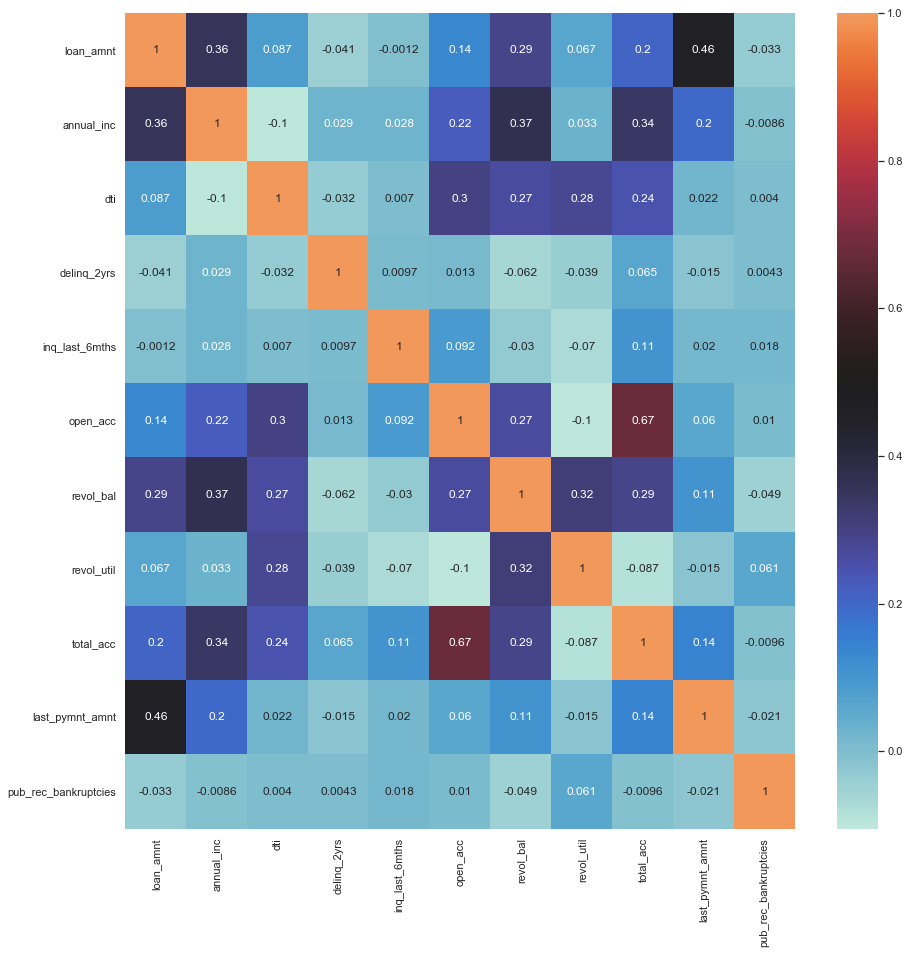

In [74]:
plt.figure(figsize=(15,15))

#Selecting only numeric variables
continous_var = ['loan_amnt','annual_inc','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','revol_bal',
                'revol_util','total_acc','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','pub_rec_bankruptcies']

# We will use df_correlations dataframe to analyze our correlations.
df_correlations = loan[continous_var].corr()

# Plot the correlation matrix
sns.heatmap(df_correlations,annot=True,center=0.5)

### 4.2.2 Purpose of loan vs loan amount for each loan status ###

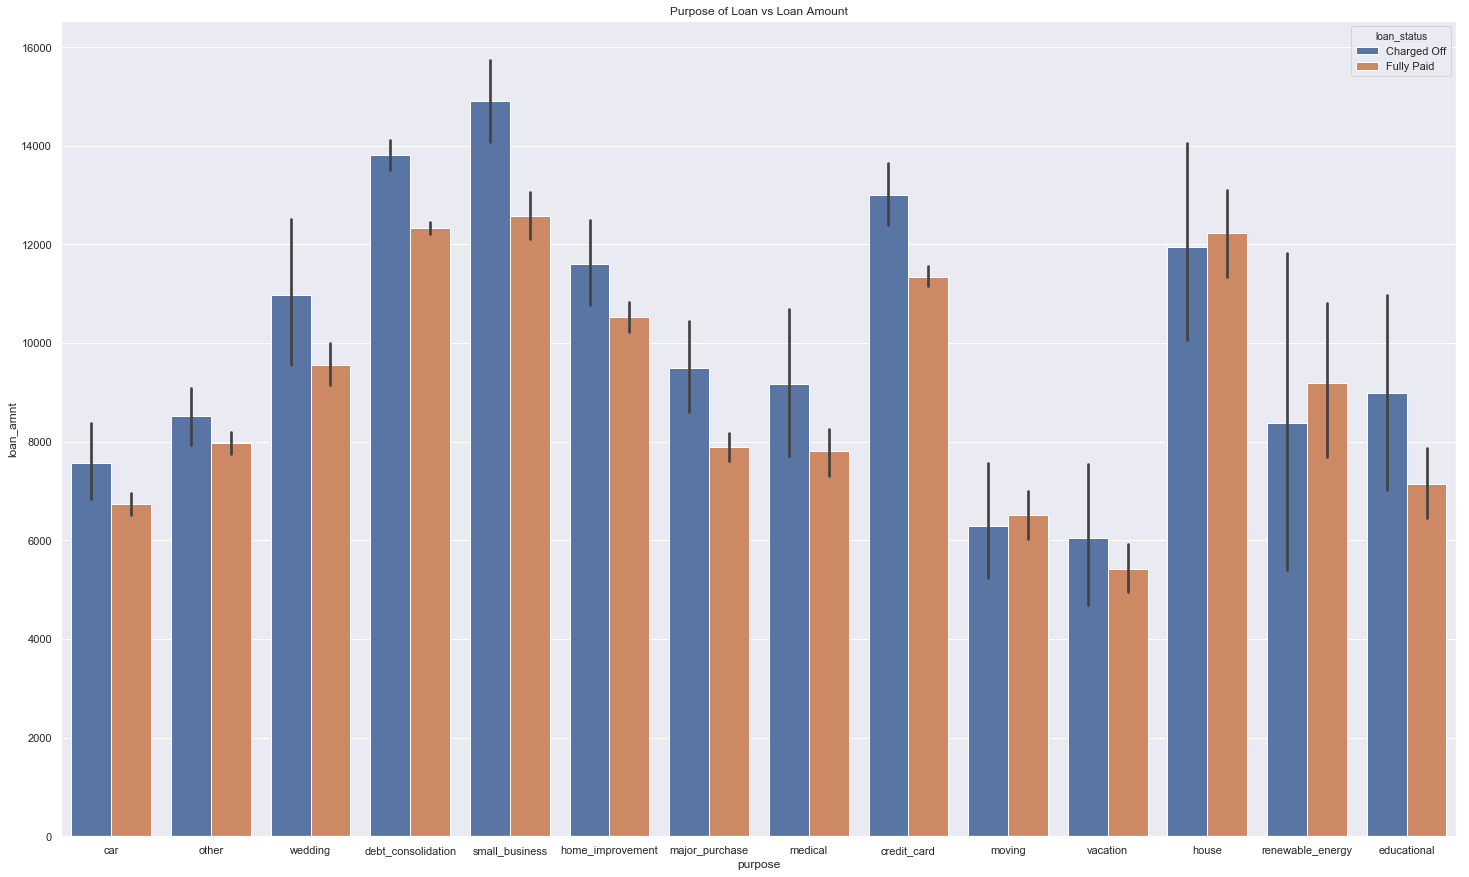

In [99]:
plt.figure(figsize=(25,15))
sns.barplot(data =loan, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

<font color=blue>***Observation : People with small business tends to take more loans as compared to another purpose and they are also the ones which default the most***</font>

### 4.2.3 Loan amount vs Time ###

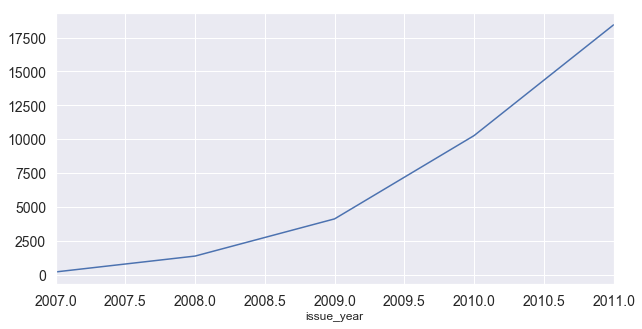

In [76]:
plt.figure(figsize=(10,5))
loan.groupby('issue_year').loan_amnt.count().plot(kind='line', fontsize=14)

<font color=blue>***Observation : From 2007 onwards, people are taking more loan with maximum loan taken during the yar of 2011. This is another indication of economic growth***</font>

### 4.2.4 Average Loan Amount over years###

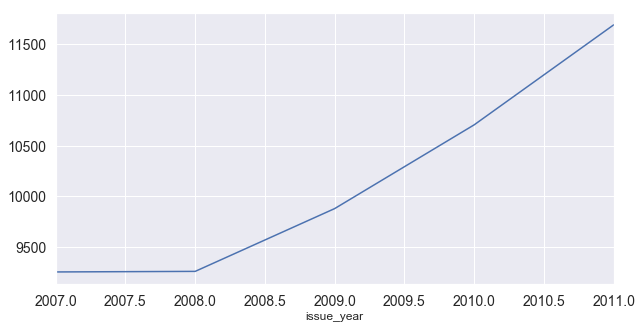

In [77]:
plt.figure(figsize=(10,5))

loan.groupby('issue_year').loan_amnt.mean().plot(kind='line', fontsize=14)
plt.show()

### 4.2.5 Employee length vs Loan amount ###

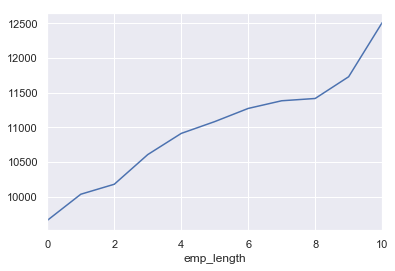

In [78]:
temp_df = loan.groupby('emp_length')['loan_amnt'].mean().sort_values(ascending=False)
temp_df.plot(kind='line')

### 4.2.6 Loan Amount vs Grade vs Term ###

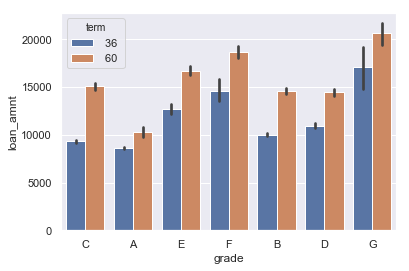

In [79]:
sns.barplot(x='grade',y='loan_amnt',hue="term",data=loan)
plt.show()

<font color=blue>***Observation : People belonging to all the grades have taken loans for 36 months as well as 60 months***</font>

### 4.2.7 Loan amount vs Grade vs Loan Status ###

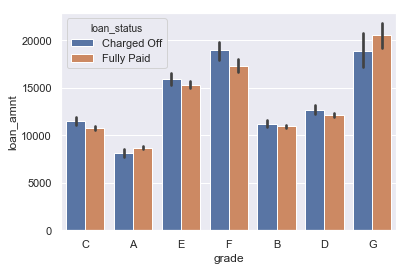

In [80]:
sns.barplot(x='grade',y='loan_amnt',hue="loan_status",data=loan)
plt.show()

<font color=blue>***Observation : From the above graph, it is clear that the people with grade F, are defaulting more as compared to others.***</font>

### 4.2.8 Loan amount vs Grade ###

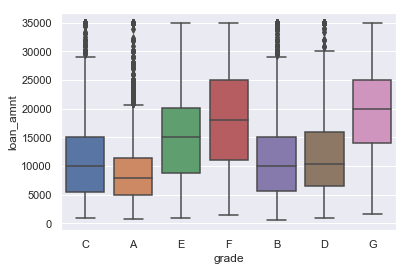

In [81]:
sns.boxplot(x="grade", y="loan_amnt", data=loan)
plt.show()

<font color=blue>***Observation : There is a great variation in the distribution of loans amont the grades***</font>

### 4.2.9 Loan amount Vs Verification Status ###

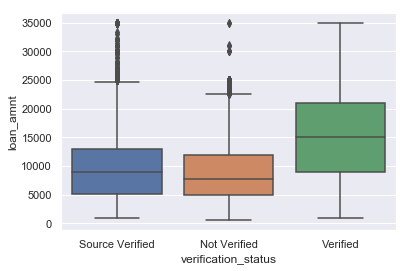

In [82]:
sns.boxplot(x="verification_status", y="loan_amnt", data=loan)
plt.show()

<font color=blue>***Observation : Verfied people are granted more loan as compared to other verification status***</font>

### 4.2.10 Loan amount vs term vs loan status ###

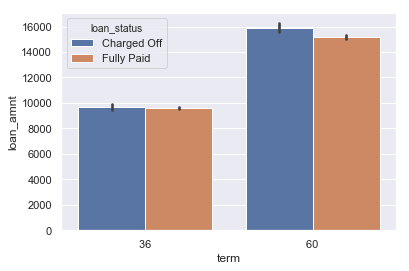

In [83]:
sns.barplot(x='term',y='loan_amnt', hue="loan_status", data=loan, estimator=np.mean)
plt.show()

<font color=blue>***Observation : Higher loan amount are associated with longer terms and higher charges off.***</font>

In [84]:
                                           # Positive and negative values

In [85]:
def plotLoanStatus(dataframe,by,loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    print(grp)
    percentage = grp.unstack() * 100 / cnt.T
    print(percentage)
    ax = percentage.loc[loanstatus].plot.bar(color=sns.color_palette('deep',16))
    ax.set_ylabel('% of loans' + loanstatus)
    print(loanstatus)
    #showLabels(ax,grp[loanstatus].to_dict())
    plt.margins(0.2,0.2)
    plt.tight_layout()
    print(ax)
    return ax

In [86]:
 loan['loan_amount_bin'] = pd.cut(loan['loan_amnt'],
                            [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

loan_status  loan_amount_bin
Charged Off  0-5k                1024
             5-10k               1463
             10-15k              1009
             15-20k               717
             20-25k               484
             25-30k               123
             30-35k               154
Fully Paid   0-5k                6823
             5-10k              10269
             10-15k              6248
             15-20k              3319
             20-25k              1926
             25-30k               455
             30-35k               386
Name: loan_amount_bin, dtype: int64
loan_amount_bin  0-5k  5-10k  10-15k  15-20k  20-25k  25-30k  30-35k
loan_status                                                         
Charged Off     13.05  12.47   13.90   17.77   20.08   21.28   28.52
Fully Paid      86.95  87.53   86.10   82.23   79.92   78.72   71.48
Charged Off
AxesSubplot(0.112755,0.243351;0.843356x0.690816)


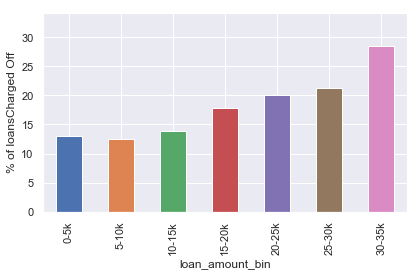

In [87]:
_=plotLoanStatus(loan,'loan_amount_bin')

### 4.2.11 Loan amount vs verification status vs term ###

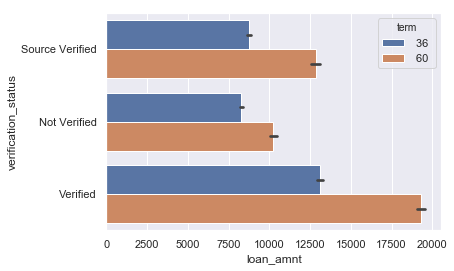

In [88]:
sns.barplot(x='loan_amnt',y='verification_status',hue="term",data=loan)
plt.show()

### 4.2.12 Employment Length vs Loan Amount for different pupose of Loan ###

In [89]:
loanstatus=loan.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loan.loc[loan['loan_status']=='Charged Off']

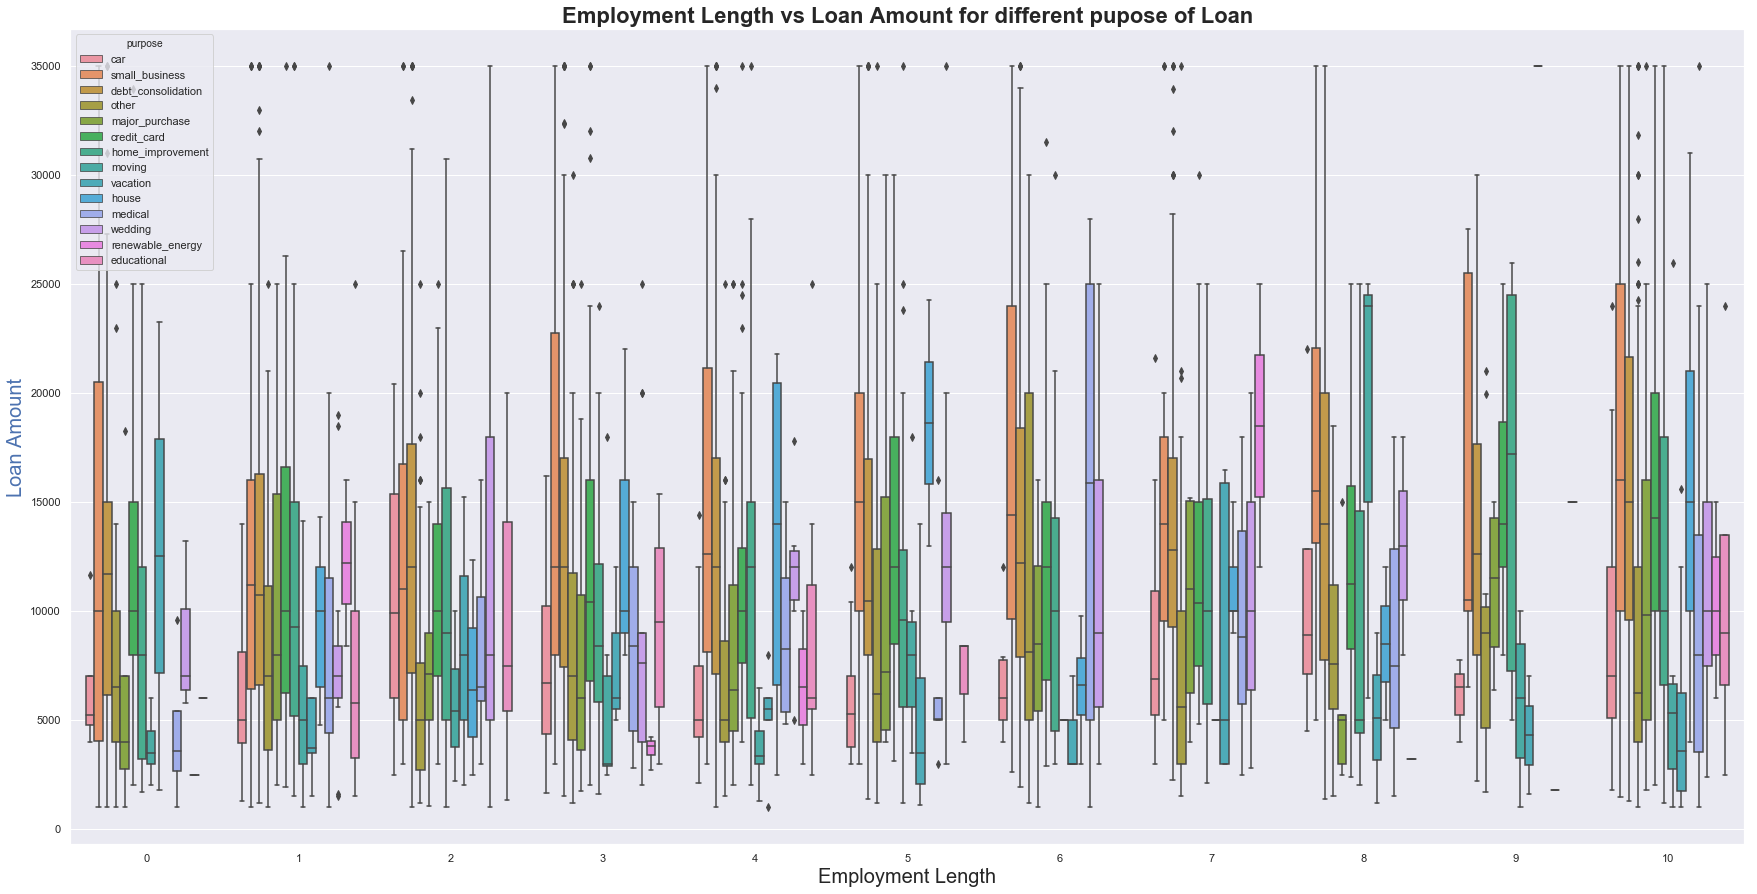

In [90]:
ax = plt.figure(figsize=(30, 15))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=20)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=20)
plt.show()

'crosstab' function will be used to get the summarized table for each column(passed as a variable) along with charge off column.

In [91]:
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Probability_Charged Off'] = round((crosstab['Charged Off']/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

'bivariate_prob' function will be used to plot count of values for each column(passed as a variable) stacked across 'loan_status' along with probability of charged off as a line chart.

In [92]:
def bivariate_pr(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

### 4.2.13 Location vs Probability Charge Off ###

In [93]:
filter_states = loan.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = loan.drop(labels = loan[loan.addr_state.isin(filter_states.index)].index)

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
addr_state,,,,
NJ,249,1340,1589,0.16
NM,29,134,163,0.18
NV,99,339,438,0.23
NY,430,2866,3296,0.13
OH,136,915,1051,0.13
OK,35,225,260,0.14
OR,62,325,387,0.16
PA,160,1157,1317,0.12
RI,23,158,181,0.13


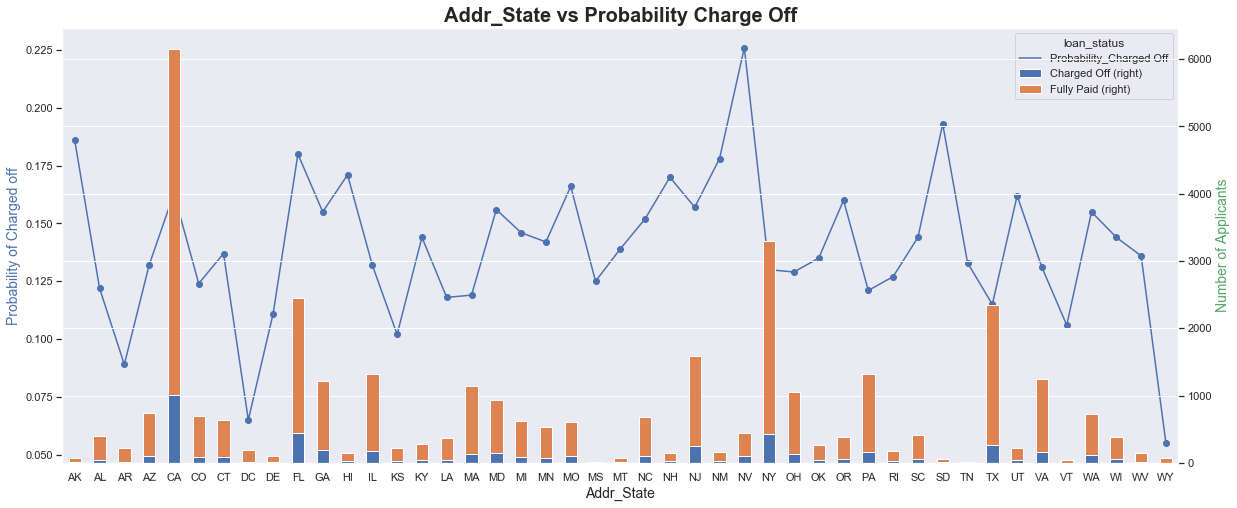

In [94]:
states = crosstab(loan_filter_states,'addr_state')
display(states.tail(20))

bivariate_pr(df =loan_filter_states,col ='addr_state')

<font color=blue>***Observation : There are multiple States/Provinces with high probability where people tends to default more as compared to other states***</font>

### 4.2.14 Purpose of Loan vs Probability Charge Off ###

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
purpose,,,,
car,142,1188,1330,0.11
credit_card,494,4082,4576,0.11
debt_consolidation,2501,13945,16446,0.15
educational,41,195,236,0.17
home_improvement,308,2162,2470,0.12
house,53,269,322,0.17
major_purchase,182,1678,1860,0.10
medical,93,503,596,0.16
moving,73,400,473,0.15


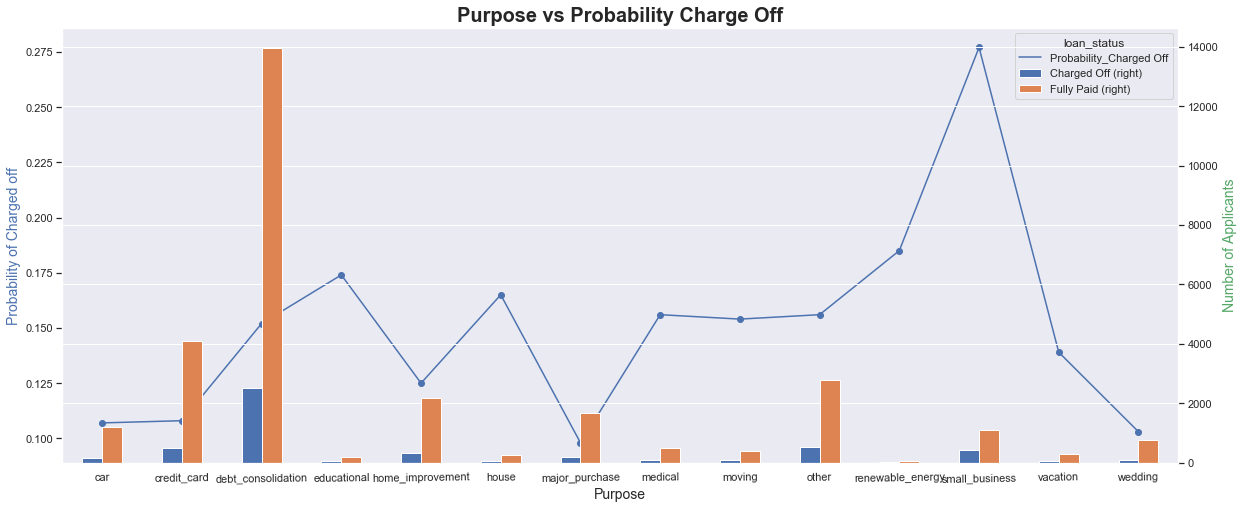

In [95]:
purpose = crosstab(loan,'purpose')
display(purpose)

bivariate_pr(df =loan,col ='purpose',stacked=False)

<font color=blue>***Observation : Applicants who has taken the Loan for 'small business' has the highest probabilty of charge off of 26%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose of 'small business'***</font>

### 4.2.15 Grade/Subgrade vs Probability Charge Off ###

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
grade,,,,
A,526,8530,9056,0.06
B,1252,9133,10385,0.12
C,1214,5779,6993,0.17
D,988,3526,4514,0.22
E,627,1721,2348,0.27
F,277,573,850,0.33
G,90,164,254,0.35


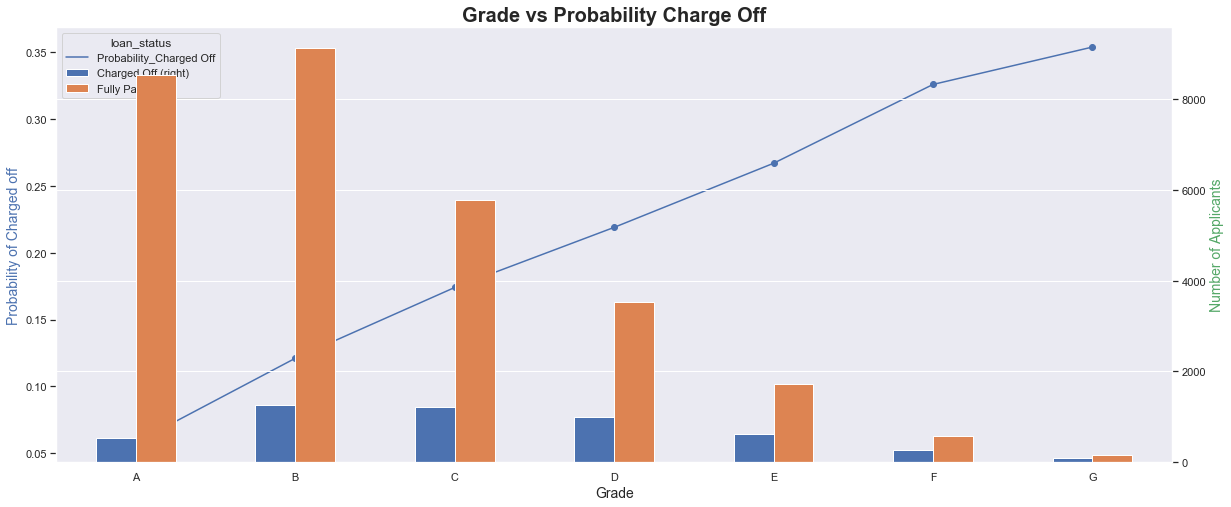

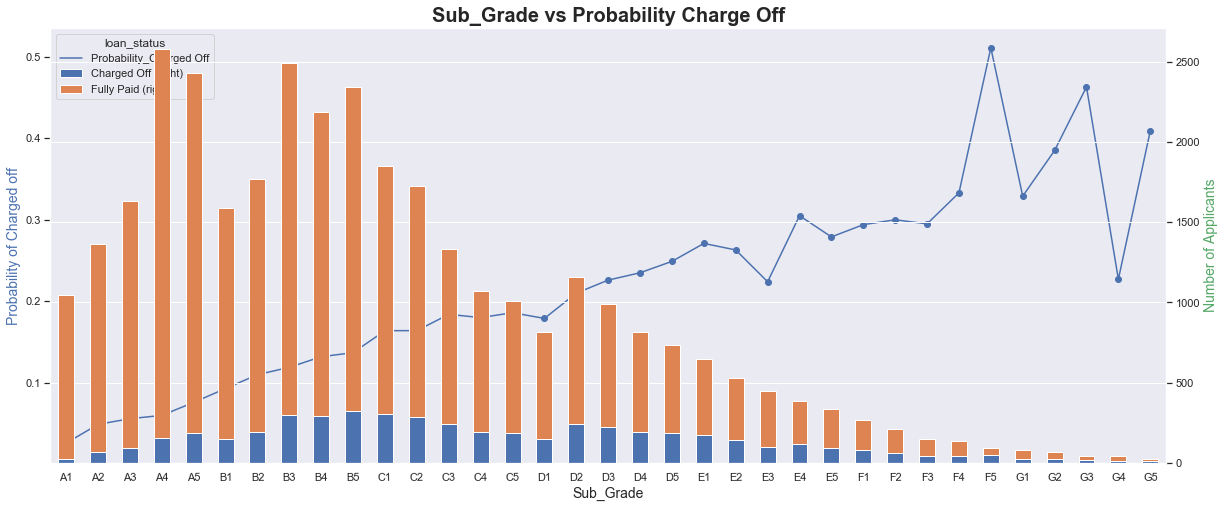

In [97]:
grade = crosstab(loan,'grade')
display(grade)

bivariate_pr(df =loan,col ='grade',stacked=False)
bivariate_pr(df =loan,col ='sub_grade')

<font color=blue>***Observation : As we move from Grade A to G, probability that person will default on their loan is gradually increasing.***</font>

### 4.2.17 Employment Length vs Probability Charge Off ###

loan_status,Charged Off,Fully Paid,All,Probability_Charged Off
emp_length,,,,
0,160,601,761,0.21
1,909,5666,6575,0.14
2,491,3260,3751,0.13
3,489,3097,3586,0.14
4,413,2612,3025,0.14
5,413,2497,2910,0.14
6,283,1716,1999,0.14
7,243,1357,1600,0.15
8,188,1125,1313,0.14


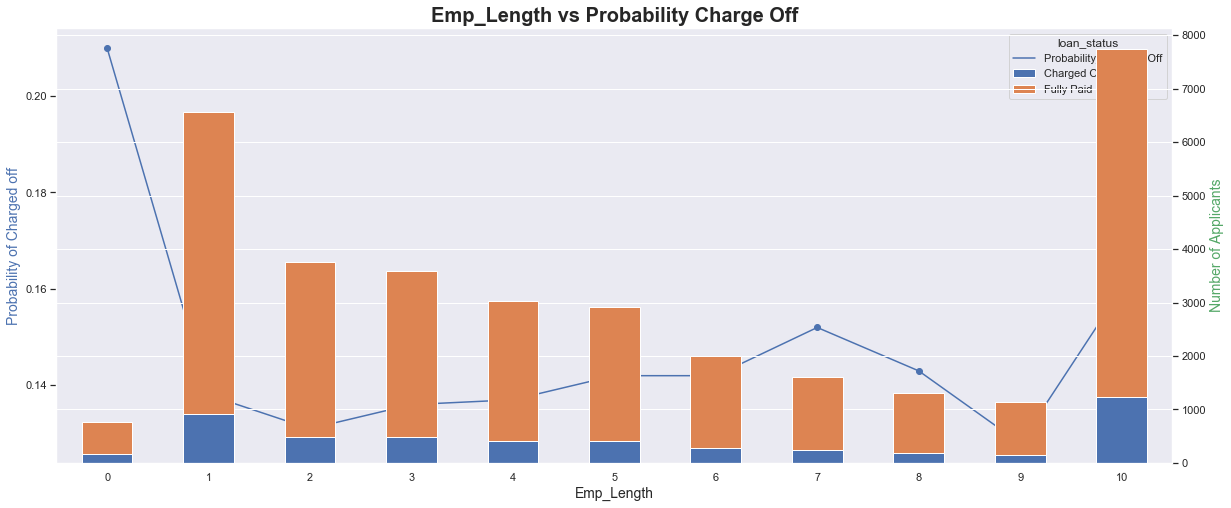

In [98]:
emp_length = crosstab(loan,'emp_length')
display(emp_length)

bivariate_pr(df =loan,col ='emp_length')

<font color=blue>***Observation : As the annual income is decreasing the probability that person will default is increasing with highest of 16% at (0 to 25000) salary bracket.***</font>